In [4]:
from keras.applications.resnet50 import ResNet50, preprocess_input

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
from keras.preprocessing import image                  
from tqdm import tqdm

from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

In [6]:
def extract_Resnet50(tensor):
    return ResNet50(weights='imagenet', include_top=False, pooling="avg").predict(preprocess_input(tensor))

In [7]:
def path_to_tensor(img_path, size=224):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(size, size))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

In [8]:
def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [9]:
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

In [158]:
def extract_resnet50_feature(path):
    tensor = path_to_tensor(path)
    return ResNet50(weights='imagenet', include_top=False, pooling="avg").predict(preprocess_input(tensor))
    

In [60]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [61]:
train_files_name = "dogImages/train"
test_file_name = "dogImages/test"

In [119]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset(train_files_name)
# valid_files, valid_targets = load_dataset()
test_files, test_targets = load_dataset(test_file_name)

dog_names = [item for item in sorted(glob("dogImages/train/*/"))]

In [17]:
test_files, test_targets = load_dataset(test_file_name)

In [196]:
tt_files_name = "testImage/test"

In [197]:
tt_files, tt_targets = load_dataset(tt_files_name)

In [198]:
tt_tensors = paths_to_tensor(tt_files)








  0%|          | 0/58 [00:00<?, ?it/s]






  5%|▌         | 3/58 [00:00<00:01, 27.78it/s]






  7%|▋         | 4/58 [00:00<00:03, 17.36it/s]






 10%|█         | 6/58 [00:01<00:08,  6.07it/s]






 28%|██▊       | 16/58 [00:01<00:04,  8.44it/s]






 41%|████▏     | 24/58 [00:01<00:03, 11.33it/s]






 52%|█████▏    | 30/58 [00:01<00:01, 14.44it/s]






 67%|██████▋   | 39/58 [00:01<00:00, 19.07it/s]






 78%|███████▊  | 45/58 [00:01<00:00, 23.81it/s]






 90%|████████▉ | 52/58 [00:01<00:00, 29.35it/s]






100%|██████████| 58/58 [00:01<00:00, 31.74it/s]

In [199]:
tt_features_resnet50 = extract_Resnet50(tt_tensors)

In [200]:
tt_features_resnet50 = np.expand_dims(tt_features_resnet50, axis=1)
tt_features_resnet50 = np.expand_dims(tt_features_resnet50, axis=1)
np.savez_compressed('tt50data',test=tt_features_resnet50)

In [18]:
print(test_targets)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [154]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

def show_sample(name):
    pp, ax = plt.subplots()
    print(name[4:])
    path = "dogImages/train/{0}/*".format(name)
    
    path = glob(path)[0]
    
    img = mpimg.imread(path)
    pp = ax.imshow(img)        
    plt.axis('off')
    plt.show()

Beauceron


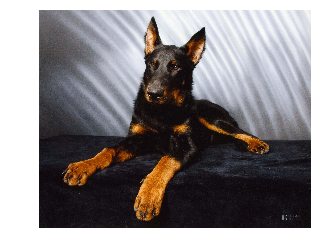

In [157]:
show_sample('018.Beauceron')

In [64]:
# pre-process the data for Keras
# train_tensors = paths_to_tensor(train_files)
test_tensors = paths_to_tensor(test_files)
# bottleneck_feature_train_res55 = [extract_Resnet50(paths_to_tensor(img_paths))]

 61%|██████▏   | 4106/6680 [01:21<00:54, 47.17it/s]






 62%|██████▏   | 4112/6680 [01:22<00:56, 45.84it/s]






 62%|██████▏   | 4118/6680 [01:22<00:55, 46.04it/s]






 62%|██████▏   | 4123/6680 [01:22<00:57, 44.31it/s]






 62%|██████▏   | 4128/6680 [01:22<01:04, 39.40it/s]






 62%|██████▏   | 4133/6680 [01:22<01:02, 40.88it/s]






 62%|██████▏   | 4138/6680 [01:22<01:03, 40.12it/s]






 62%|██████▏   | 4143/6680 [01:22<01:05, 39.01it/s]






 62%|██████▏   | 4149/6680 [01:22<00:59, 42.55it/s]






 62%|██████▏   | 4154/6680 [01:23<00:58, 43.22it/s]






 62%|██████▏   | 4159/6680 [01:23<00:57, 44.15it/s]






 62%|██████▏   | 4164/6680 [01:23<01:17, 32.57it/s]






 62%|██████▏   | 4170/6680 [01:23<01:06, 37.68it/s]






 62%|██████▎   | 4175/6680 [01:23<01:09, 35.90it/s]






 63%|██████▎   | 4183/6680 [01:23<00:58, 42.85it/s]






 63%|██████▎   | 4189/6680 [01:23<00:55, 44.57it/s]






 63%|██████▎   | 4195/6680 [01:23<00:51, 47.94it/s]






 63%|██████▎  

 81%|████████  | 5393/6680 [01:49<00:29, 43.45it/s]






 81%|████████  | 5399/6680 [01:49<00:28, 44.32it/s]






 81%|████████  | 5404/6680 [01:49<00:30, 41.56it/s]






 81%|████████  | 5409/6680 [01:49<00:35, 36.19it/s]






 81%|████████  | 5413/6680 [01:50<00:37, 34.07it/s]






 81%|████████  | 5418/6680 [01:50<00:34, 36.95it/s]






 81%|████████  | 5425/6680 [01:50<00:29, 42.45it/s]






 81%|████████▏ | 5431/6680 [01:50<00:27, 46.15it/s]






 81%|████████▏ | 5437/6680 [01:50<00:27, 45.13it/s]






 81%|████████▏ | 5442/6680 [01:50<00:35, 35.31it/s]






 82%|████████▏ | 5447/6680 [01:50<00:32, 37.86it/s]






 82%|████████▏ | 5455/6680 [01:50<00:27, 44.80it/s]






 82%|████████▏ | 5461/6680 [01:51<00:26, 45.50it/s]






 82%|████████▏ | 5467/6680 [01:51<00:25, 47.30it/s]






 82%|████████▏ | 5473/6680 [01:51<00:23, 50.44it/s]






 82%|████████▏ | 5479/6680 [01:51<00:24, 49.16it/s]






 82%|████████▏ | 5485/6680 [01:51<00:24, 48.75it/s]






 82%|████████▏

100%|█████████▉| 6665/6680 [02:17<00:00, 36.95it/s]






100%|█████████▉| 6671/6680 [02:18<00:00, 41.41it/s]






100%|█████████▉| 6677/6680 [02:18<00:00, 31.31it/s]






100%|██████████| 6680/6680 [02:18<00:00, 48.27it/s]






  0%|          | 0/836 [00:00<?, ?it/s]






  0%|          | 3/836 [00:00<00:41, 20.06it/s]






  1%|          | 6/836 [00:00<00:38, 21.56it/s]






  1%|          | 9/836 [00:00<00:35, 23.01it/s]






  2%|▏         | 17/836 [00:00<00:28, 29.16it/s]






  3%|▎         | 27/836 [00:00<00:21, 36.98it/s]






  4%|▍         | 33/836 [00:00<00:19, 40.33it/s]






  5%|▍         | 39/836 [00:00<00:19, 41.14it/s]






  5%|▌         | 45/836 [00:00<00:17, 44.06it/s]






  6%|▌         | 51/836 [00:01<00:36, 21.42it/s]






  7%|▋         | 55/836 [00:01<00:32, 24.34it/s]






  7%|▋         | 59/836 [00:01<00:31, 24.45it/s]






  8%|▊         | 63/836 [00:01<00:27, 27.63it/s]






  8%|▊         | 67/836 [00:02<00:26, 28.91it/s]






  9%|▉    

In [112]:
train_features_resnet50 = extract_Resnet50(train_tensors)

In [105]:
test_features_resnet50 = extract_Resnet50(test_tensors)

In [114]:
np.savez_compressed('resnet50data',test=test_features_resnet50, train = train_features_resnet50)

In [ ]:
print([i for i in train_features_resnet50[0][0][0]])

In [55]:
x = np.load("DogResnet50Data.npz")

In [187]:
loaded_x = np.load('resnet50data.npz')
loaded_x_train = loaded_x['train']
loaded_x_test = loaded_x['test']

In [117]:
loaded_x_train == train_features_resnet50

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [176]:
x_train = x['train']
x_test = x['test']

In [107]:
tt = test_features_resnet50
tt = np.expand_dims(tt, axis=1)
tt = np.expand_dims(tt, axis=1)
# test_features_resnet50 = test_features_resnet50[0]
print(np.array(tt).shape)

(836, 1, 1, 2048)


In [177]:
print(np.array(x_train).shape)

(6680, 1, 1, 2048)
